In [1]:
!conda init
!conda activate quantization

no change     /home/brocolimanx/miniconda3/condabin/conda
no change     /home/brocolimanx/miniconda3/bin/conda
no change     /home/brocolimanx/miniconda3/bin/conda-env
no change     /home/brocolimanx/miniconda3/bin/activate
no change     /home/brocolimanx/miniconda3/bin/deactivate
no change     /home/brocolimanx/miniconda3/etc/profile.d/conda.sh
no change     /home/brocolimanx/miniconda3/etc/fish/conf.d/conda.fish
no change     /home/brocolimanx/miniconda3/shell/condabin/Conda.psm1
no change     /home/brocolimanx/miniconda3/shell/condabin/conda-hook.ps1
no change     /home/brocolimanx/miniconda3/lib/python3.12/site-packages/xontrib/conda.xsh
no change     /home/brocolimanx/miniconda3/etc/profile.d/conda.csh
no change     /home/brocolimanx/.bashrc
No action taken.

CondaError: Run 'conda init' before 'conda activate'



In [2]:
from utils import get_loaders, load_checkpoint
from config import *
from config import blank_transform
from model import UNET
import torch
import torchvision.transforms as transforms
import os
from PIL import Image
import matplotlib.pyplot as plt
os.chdir("/home/brocolimanx/Desktop/Code")

[Action] Loading Checkpoint...
[Event] Checkpoint Loaded.


/tmp/ipykernel_4741/782809901.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_checkpoint(torch.load(MODEL_NAME), model)


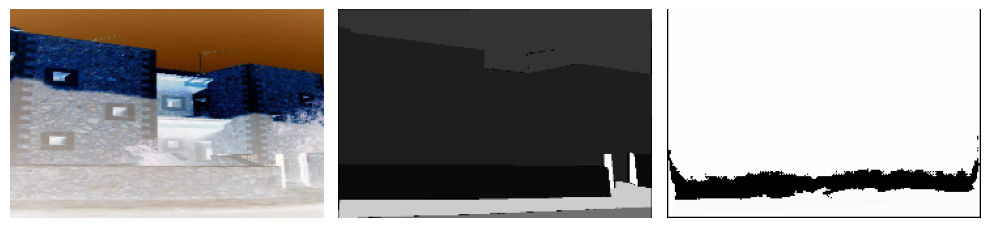

In [13]:
toPil = transforms.ToPILImage()
train_loader, val_loader = get_loaders(
        CLASSES,
        TRAIN_IMG_DIR,
        TRAIN_MASK_DIR,
        VAL_IMG_DIR,
        VAL_MASK_DIR,
        BATCH_SIZE,
        blank_transform,
        blank_transform,
        blank_transform,
        NUM_WORKERS,
        PIN_MEMORY,
        FN_FORMAT
    )

MODEL_NAME = "segmentation/saved_models/ade20k_vB_1.tar"
model = UNET(in_channels=3, out_channels=CLASSES+1).to(DEVICE)
load_checkpoint(torch.load(MODEL_NAME), model)

imgs = None
for batch, (x,y, _) in enumerate(train_loader):
    x = x.cuda().float()
    y = y[0].cuda().float()/150.0
    pred = model(x)[0]
    x=x[0]
    pred = torch.argmax(pred, 0).float().cpu()
    imgs = [toPil(x),toPil(y), toPil(pred)]
    
    break

fig,axes = plt.subplots(1, 3, figsize=(10,5))
for i, ax in enumerate(axes.flat):
    ax.imshow(imgs[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()